# Part A : Working with RDDs and DataFrames

## 1. Working with RDD
## 1.1 Data Preparation and Loading

### 1.Write the code to create a SparkContext object using SparkSession

In [1]:
from pyspark import SparkConf
from pyspark.sql import SparkSession
from pyspark import SparkContext

master = "local[*]"
app_name = "Assignment-1"
sparkconf = SparkConf().setMaster(master).setAppName(app_name)

spark = SparkSession.builder.config(conf = sparkconf).getOrCreate()
sc = spark.sparkContext
sc.setLogLevel("ERROR")

### 2. Import all the “Units” csv files from 2015-2019 into a single RDD.
### 3. Import all the “Crashes” csv files from 2015-2019 into a single RDD. 
### 4. For each Units and Crashes RDDs, remove the header rows and display the total count and first 10 records. Hint : You can use csv.reader to parse rowsin RDDs.

In [2]:
# Read all the units_csv file and load into an RDD object
units_rdd = sc.textFile("./*_Units.csv")
data_list = units_rdd.map(lambda line: line.replace('"', '').split(",") )

# First find out the content of the header line
header = data_list.first()
# Then use filter to filter all header lines
units_rdd = data_list.filter(lambda line: line != header)

units_rdd.count()

153854

In [3]:
units_rdd.take(10)

[['2015-1-21/08/2019',
  '01',
  '0',
  'SA',
  'RIGID TRUCK LGE GE 4.5T',
  '1999',
  'North East',
  'Male',
  '052',
  'SA',
  'HRR ',
  'Full',
  'Not Towing',
  'Swerving',
  '001',
  '5109',
  '',
  ''],
 ['2015-1-21/08/2019',
  '02',
  '1',
  'SA',
  'Motor Cars - Sedan',
  '2009',
  'North East',
  'Female',
  '057',
  'SA',
  'C ',
  'Full',
  'Not Towing',
  'Straight Ahead',
  '002',
  '5125',
  '',
  ''],
 ['2015-2-21/08/2019',
  '01',
  '0',
  'SA',
  'Motor Cars - Sedan',
  '2009',
  'South East',
  'Male',
  '020',
  'SA',
  'MR',
  'Provisional 1 ',
  'Not Towing',
  'Straight Ahead',
  '001',
  '5110',
  '',
  ''],
 ['2015-2-21/08/2019',
  '02',
  '1',
  'SA',
  'Motor Cars - Sedan',
  '1994',
  'South East',
  'Female',
  '021',
  'SA',
  'C ',
  'Full',
  'Not Towing',
  'Stopped on Carriageway',
  '001',
  '5096',
  '',
  ''],
 ['2015-3-21/08/2019',
  '01',
  '0',
  'SA',
  'Motor Cars - Sedan',
  '2008',
  'North East',
  'Male',
  '023',
  'SA',
  'C ',
  'Full',


In [4]:
# Read all the units_csv file and load into an RDD object
crashes_rdd = sc.textFile("./*_Crash.csv")
data_list = crashes_rdd.map(lambda line: line.replace('"', '').split(","))

# First find out the content of the header line
header = data_list.first()
# Then use filter to filter all header lines
crashes_rdd = data_list.filter(lambda line: line != header)

crashes_rdd.count()

72006

In [5]:
crashes_rdd.take(10)

[['2015-1-21/08/2019',
  '2 Metropolitan',
  'ELIZABETH VALE',
  '5112',
  'CITY OF PLAYFORD.',
  '2',
  '1',
  '0',
  '0',
  '1',
  '2015',
  'January',
  'Wednesday',
  '01:00 pm',
  '060',
  'T-Junction',
  'Straight road',
  'Level',
  'Not Applicable',
  'Sealed',
  'Dry',
  'Not Raining',
  'Daylight',
  'Side Swipe',
  '01',
  'Driver Rider',
  '2: MI',
  'No Control',
  '',
  '',
  '1335254.54',
  '1690056.88',
  '13352551690057'],
 ['2015-2-21/08/2019',
  '2 Metropolitan',
  'SALISBURY',
  '5108',
  'CITY OF SALISBURY',
  '2',
  '1',
  '0',
  '0',
  '1',
  '2015',
  'February',
  'Tuesday',
  '03:38 pm',
  '060',
  'Cross Road',
  'Straight road',
  'Level',
  'Not Applicable',
  'Sealed',
  'Dry',
  'Not Raining',
  'Daylight',
  'Rear End',
  '01',
  'Driver Rider',
  '2: MI',
  'Traffic Signals',
  '',
  '',
  '1333389.6',
  '1688248.34',
  '13333901688248'],
 ['2015-3-21/08/2019',
  '2 Metropolitan',
  'ST MARYS',
  '5042',
  'CC MITCHAM.                   ',
  '2',
  '1',

## 1.2 Data Partitioning in RDD 
### 1. How many partitions do the above RDDs have?

In [6]:
partitions = units_rdd.glom().collect()
for partition in partitions:
    print(len(partition))
# rdd is evenly distributed

33085
35862
28164
29034
27714


### 2. a. Create a Key Value Pair RDD with Lic State as the key and rest of the other columns as value.

In [7]:
key_value = units_rdd.map(lambda x :(x[9], x[:9] + x[10:]))

### b. Write the code to implement this partitioning in RDD using appropriate partitioning functions.

In [8]:
no_of_partitions = 2

def Lic_State_function(key):

    if(key == "SA"):
        return 0
    else:
        return 1

units_partitioned_rdd = key_value.partitionBy(no_of_partitions, Lic_State_function)

### c. Write the code to print the number of records in each partition. 

In [9]:
def print_partitions(data):
    numPartitions = data.getNumPartitions()
    partitions = data.glom().collect()
    
    print(f"####### NUMBER OF PARTITIONS: {numPartitions}")
    for index, partition in enumerate(partitions):
        # show partition if it is not empty
        if len(partition) > 0:
            print(f"Partition {index}: {len(partition)} ")
            
print_partitions(units_partitioned_rdd)
# There are more records related to SA

####### NUMBER OF PARTITIONS: 2
Partition 0: 109684 
Partition 1: 44175 


## 1.3 Query/Analysis 
### For the Units RDD, write relevant RDD operations to answer the following queries. 
###      1. Find the average age of male and female drivers separately.

In [10]:
male_drivers = units_rdd.filter(lambda x : x[7] == 'Male' and x[8].isnumeric())
male_age = male_drivers.map(lambda x : int(x[8]))
male_average_age = male_age.reduce(lambda x,y: x+ y)/male_drivers.count()
male_average_age

40.975960299920004

In [11]:
female_drivers = units_rdd.filter(lambda x : x[7] == 'Female' and x[8].isnumeric())
female_age = female_drivers.map(lambda x : int(x[8]))
female_average_age = female_age.reduce(lambda x,y: x+ y)/female_drivers.count()
female_average_age

40.38729268862415

### 2. What is the oldest and the newest vehicle year involved in the accident? Display the Registration State, Year and Unit type of the vehicle.

In [12]:
years  = units_rdd.filter(lambda x : x[5].isnumeric())
oldest_vehicle = years.sortBy(lambda x : x[5], ascending = True).take(1)[0]
oldest_vehicle[9] +'-' + oldest_vehicle[5] +'-' + oldest_vehicle[4]

'VIC-1900-Motor Cycle'

In [13]:
years  = units_rdd.filter(lambda x : x[5].isnumeric())
newest_vehicle = years.sortBy(lambda x : x[5], ascending = False).take(1)[0]
newest_vehicle[9] +'-' + newest_vehicle[5] +'-' + newest_vehicle[4]

'SA-2019-Station Wagon'

## 2. Working with DataFrames
### 2.1 Data Preparation and Loading 
### 1. Load all units and crash data into two separate dataframes

In [14]:
units_df = spark.read.csv("./*_Units.csv", header = True, inferSchema = True)
crashes_df = spark.read.csv("./*_Crash.csv", header = True, inferSchema = True)

In [15]:
units_df.printSchema()
crashes_df.printSchema()

root
 |-- REPORT_ID: string (nullable = true)
 |-- Unit No: integer (nullable = true)
 |-- No Of Cas: integer (nullable = true)
 |-- Veh Reg State: string (nullable = true)
 |-- Unit Type: string (nullable = true)
 |-- Veh Year: string (nullable = true)
 |-- Direction Of Travel: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Lic State: string (nullable = true)
 |-- Licence Class: string (nullable = true)
 |-- Licence Type: string (nullable = true)
 |-- Towing: string (nullable = true)
 |-- Unit Movement: string (nullable = true)
 |-- Number Occupants: string (nullable = true)
 |-- Postcode: string (nullable = true)
 |-- Rollover: string (nullable = true)
 |-- Fire: string (nullable = true)

root
 |-- REPORT_ID: string (nullable = true)
 |-- Stats Area: string (nullable = true)
 |-- Suburb: string (nullable = true)
 |-- Postcode: integer (nullable = true)
 |-- LGA Name: string (nullable = true)
 |-- Total Units: integer (nullable = tr

## 2.2 Query/Analysis
### 1. Find all the crash events in Adelaide where the total number of casualties in the event is more than 3.

In [16]:
import pyspark.sql.functions as F
crashes_df.filter((F.col("Suburb") == "ADELAIDE") & (F.col("Total Cas") > 3)).show()

+--------------------+----------+--------+--------+----------------+-----------+---------+----------+--------+--------+----+--------+--------+--------+----------+-------------+----------------+--------------+--------------------+------------+-------------+------------+--------+--------------+---------+------------+-------------+---------------+------------+--------------+----------+----------+--------------+
|           REPORT_ID|Stats Area|  Suburb|Postcode|        LGA Name|Total Units|Total Cas|Total Fats|Total SI|Total MI|Year|   Month|     Day|    Time|Area Speed|Position Type|Horizontal Align|Vertical Align|          Other Feat|Road Surface|Moisture Cond|Weather Cond|DayNight|    Crash Type|Unit Resp| Entity Code|CSEF Severity|  Traffic Ctrls|DUI Involved|Drugs Involved|  ACCLOC_X|  ACCLOC_Y|    UNIQUE_LOC|
+--------------------+----------+--------+--------+----------------+-----------+---------+----------+--------+--------+----+--------+--------+--------+----------+-------------+

### 2. Display 10 crash events with highest casualties

In [17]:
crashes_df.sort("Total Cas", ascending = False).show(10)

+--------------------+--------------+---------------+--------+--------------------+-----------+---------+----------+--------+--------+----+--------+---------+--------+----------+-------------+--------------------+--------------+--------------+------------+-------------+------------+--------+-----------+---------+------------+-------------+---------------+------------+--------------+----------+----------+--------------+
|           REPORT_ID|    Stats Area|         Suburb|Postcode|            LGA Name|Total Units|Total Cas|Total Fats|Total SI|Total MI|Year|   Month|      Day|    Time|Area Speed|Position Type|    Horizontal Align|Vertical Align|    Other Feat|Road Surface|Moisture Cond|Weather Cond|DayNight| Crash Type|Unit Resp| Entity Code|CSEF Severity|  Traffic Ctrls|DUI Involved|Drugs Involved|  ACCLOC_X|  ACCLOC_Y|    UNIQUE_LOC|
+--------------------+--------------+---------------+--------+--------------------+-----------+---------+----------+--------+--------+----+--------+------

### 3. Find the total number of fatalities for each crash type.

In [18]:
crashes_df.groupby("Crash Type").sum("Total Fats").show()

+--------------------+---------------+
|          Crash Type|sum(Total Fats)|
+--------------------+---------------+
|           Roll Over|             57|
|  Hit Object on Road|              2|
|      Hit Pedestrian|             70|
|    Hit Fixed Object|            152|
|               Other|              2|
|          Side Swipe|             20|
|             Head On|             86|
|  Hit Parked Vehicle|              9|
|          Right Turn|             18|
|            Rear End|             16|
|          Hit Animal|              4|
|Left Road - Out o...|              1|
|         Right Angle|             45|
+--------------------+---------------+



### 4. Find the total number of casualties for each suburb when the vehicle was driven by an unlicensed driver

In [19]:
units_df.filter(F.col("Licence Type") == "Unlicenced")\
    .join(crashes_df, crashes_df.REPORT_ID == units_df.REPORT_ID)\
    .groupby("Suburb").sum("Total Cas").show()

+-------------------+--------------+
|             Suburb|sum(Total Cas)|
+-------------------+--------------+
|      FLINDERS PARK|             8|
|       POOGINAGORIC|             1|
|     TEA TREE GULLY|             1|
|            HACKHAM|             3|
|   MEDINDIE GARDENS|             0|
|           WISANGER|             1|
|            CUMMINS|             0|
|       BASKET RANGE|             0|
|MURRAY BRIDGE SOUTH|             0|
|      GILLES PLAINS|             7|
|             HAWKER|             0|
|           BEAUFORT|             1|
|             MAGILL|             7|
|            ECHUNGA|             1|
|            CULTANA|             1|
|        EDWARDSTOWN|             6|
|        RISDON PARK|             1|
|          THORNGATE|             1|
|       ANDREWS FARM|            12|
|       TORRENSVILLE|             5|
+-------------------+--------------+
only showing top 20 rows



## 2.3 Severity Analysis
### 1. Find the total number of crash events for each severity level. Which severity level is the most common?

In [20]:
crashes_df.groupby("CSEF Severity").count().sort("count", ascending = False).show()
# PDO level is the most common

+-------------+-----+
|CSEF Severity|count|
+-------------+-----+
|       1: PDO|46696|
|        2: MI|21881|
|        3: SI| 2978|
|     4: Fatal|  451|
+-------------+-----+



### 2. Compute the total number of crash events for each severity level and the percentage for the four different scenarios.
#### a. When the driver is tested positive on drugs

In [21]:
drugs_positive = crashes_df.filter(F.col("Drugs Involved") == "Y")
drugs_positive_percentage = drugs_positive.groupby("CSEF Severity").count()\
    .withColumn("percentage", F.col("count") * 100 / drugs_positive.count())\
    .sort("count", ascending = False)
drugs_positive_percentage.show()

+-------------+-----+------------------+
|CSEF Severity|count|        percentage|
+-------------+-----+------------------+
|        2: MI|  749|59.728867623604465|
|        3: SI|  247|19.696969696969695|
|       1: PDO|  176|14.035087719298245|
|     4: Fatal|   82| 6.539074960127592|
+-------------+-----+------------------+



#### b. When the driver is tested positive for blood alcohol concentration.

In [22]:
alcohol_positive = crashes_df.filter(F.col("DUI Involved") == "Y")
alcohol_positive_percentage = alcohol_positive.groupby("CSEF Severity").count()\
    .withColumn("percentage", F.col("count") * 100 / alcohol_positive.count())\
    .sort("count", ascending = False)
alcohol_positive_percentage.show()

+-------------+-----+------------------+
|CSEF Severity|count|        percentage|
+-------------+-----+------------------+
|       1: PDO| 1173|52.179715302491104|
|        2: MI|  737|  32.7846975088968|
|        3: SI|  259| 11.52135231316726|
|     4: Fatal|   79|  3.51423487544484|
+-------------+-----+------------------+



#### c. When the driver is tested positive for both drugs and blood alcohol

In [23]:
drugs_alcohol_positive = crashes_df.filter((F.col("Drugs Involved") == "Y") & (F.col("DUI Involved") == "Y"))
drugs_alcohol_positive_percentage = drugs_alcohol_positive.groupby("CSEF Severity").count()\
    .withColumn("percentage", F.col("count") * 100 / drugs_alcohol_positive.count())\
    .sort("count", ascending = False)
drugs_alcohol_positive_percentage.show()

+-------------+-----+------------------+
|CSEF Severity|count|        percentage|
+-------------+-----+------------------+
|        2: MI|   89|50.857142857142854|
|        3: SI|   35|              20.0|
|     4: Fatal|   27|15.428571428571429|
|       1: PDO|   24|13.714285714285714|
+-------------+-----+------------------+



#### d. When the driver is tested negative for both (no alcohol and no drugs)

In [24]:
drugs_alcohol_negative = crashes_df.filter((F.col("Drugs Involved").isNull()) & (F.col("DUI Involved").isNull()))
drugs_alcohol_negative_percentage = drugs_alcohol_negative.groupby("CSEF Severity").count()\
    .withColumn("percentage", F.col("count") * 100 / drugs_alcohol_negative.count())\
    .sort("count", ascending = False)
drugs_alcohol_negative_percentage.show()

+-------------+-----+------------------+
|CSEF Severity|count|        percentage|
+-------------+-----+------------------+
|       1: PDO|45371| 66.06240626683557|
|        2: MI|20484|29.825710916000524|
|        3: SI| 2507|3.6503152346423215|
|     4: Fatal|  317|0.4615675825215859|
+-------------+-----+------------------+



## 2.4 RDDs vs DataFrame vs Spark SQL
### 1. Find the Date and Time of Crash, Number of Casualties in each unit and the Gender,  Age, License Type of the unit driver for the suburb "Adelaide".

### RDDs

In [25]:
%%time
crashes_key_values = crashes_rdd.filter(lambda x: x[2] == "ADELAIDE").map(lambda x: (x[0], x[1:]))
units_key_values = units_rdd.map(lambda x: (x[0], x[1:]))
rdd_1 = crashes_key_values.join(units_key_values)\
    .mapValues(lambda x: [f"{x[0][9]}-{x[0][10]}-{x[0][11]}", x[0][12], x[0][5], x[1][6], x[1][7], x[1][10]]).collect()

CPU times: user 56 ms, sys: 16.3 ms, total: 72.3 ms
Wall time: 6.33 s


### DataFrame

In [26]:
%%time
df_1 = crashes_df.filter(F.col("suburb") == "ADELAIDE").join(units_df, units_df.REPORT_ID == crashes_df.REPORT_ID)\
.withColumn("Date", F.concat(F.col("Year"), F.lit("-"), F.col("Month"), F.lit("-"), F.col("Day")))\
.select("Date", "Time", "Total CAS", "Sex", "Age", "Licence Type").collect()

CPU times: user 56 ms, sys: 7.94 ms, total: 63.9 ms
Wall time: 2.02 s


### Spark SQL

In [27]:
crashes_df.createOrReplaceTempView("crashes_sql")
units_df.createOrReplaceTempView("units_sql")

In [28]:
%%time

sql_1 = spark.sql('''
SELECT CONCAT(c.year,'-',c.month,'-',c.day) AS Date, c.Time, `Total Cas`, Sex, Age, `Licence Type`
FROM crashes_sql as c join units_sql as u
WHERE c.REPORT_ID == u.REPORT_ID AND c.Suburb == "ADELAIDE"
''').collect()

CPU times: user 36.3 ms, sys: 0 ns, total: 36.3 ms
Wall time: 1.86 s


### 2. Find the total number of casualties for each suburb when the vehicle was driven by an unlicensed driver.

### RDDs

In [29]:
%%time
crashes_key_values = crashes_rdd.map(lambda x: (x[0], x[1:]))
units_key_values = units_rdd.filter(lambda x: x[11] == "Unlicenced")\
    .map(lambda x: (x[0], x[1:]))
crashes_key_values.join(units_key_values).map(lambda x : x[1][0])\
    .map(lambda x: (x[1], int(x[5])))\
    .reduceByKey(lambda x,y : x+y).take(20)

CPU times: user 51.7 ms, sys: 7.92 ms, total: 59.6 ms
Wall time: 5.22 s


[('PARALOWIE', 4),
 ('BIRKENHEAD', 2),
 ('BERRI', 3),
 ('CLOVELLY PARK', 1),
 ('DAVOREN PARK', 8),
 ('HACKHAM', 3),
 ('MODBURY NORTH', 3),
 ('FULLARTON', 0),
 ('HAPPY VALLEY', 5),
 ('MUNNO PARA WEST', 1),
 ('HEATHPOOL', 3),
 ('NORTH PLYMPTON', 1),
 ('WHITES FLAT', 0),
 ('CRAIGMORE', 2),
 ('URRBRAE', 2),
 ('ONKAPARINGA HILLS', 7),
 ('FIRLE', 6),
 ('RIVERGLADES', 1),
 ('SALISBURY PARK', 0),
 ('NOARLUNGA CENTRE', 1)]

### DataFrame

In [30]:
%%time

df_2 = units_df.filter(F.col("Licence Type") == "Unlicenced").join(crashes_df, crashes_df.REPORT_ID == units_df.REPORT_ID)\
    .groupby("Suburb").sum("Total Cas").show()

+-------------------+--------------+
|             Suburb|sum(Total Cas)|
+-------------------+--------------+
|      FLINDERS PARK|             8|
|       POOGINAGORIC|             1|
|     TEA TREE GULLY|             1|
|            HACKHAM|             3|
|   MEDINDIE GARDENS|             0|
|           WISANGER|             1|
|            CUMMINS|             0|
|       BASKET RANGE|             0|
|MURRAY BRIDGE SOUTH|             0|
|      GILLES PLAINS|             7|
|             HAWKER|             0|
|           BEAUFORT|             1|
|             MAGILL|             7|
|            ECHUNGA|             1|
|            CULTANA|             1|
|        EDWARDSTOWN|             6|
|        RISDON PARK|             1|
|          THORNGATE|             1|
|       ANDREWS FARM|            12|
|       TORRENSVILLE|             5|
+-------------------+--------------+
only showing top 20 rows

CPU times: user 6.04 ms, sys: 302 µs, total: 6.34 ms
Wall time: 1.71 s


### Spark SQL

In [31]:
%%time
spark.sql('''
SELECT c.Suburb, sum(`Total Cas`) 
FROM crashes_sql as c join units_sql as u on c.REPORT_ID == u.REPORT_ID
WHERE u.`Licence Type` == "Unlicenced"
GROUP BY c.Suburb
''').show()

+-------------------+--------------+
|             Suburb|sum(Total Cas)|
+-------------------+--------------+
|      FLINDERS PARK|             8|
|       POOGINAGORIC|             1|
|     TEA TREE GULLY|             1|
|            HACKHAM|             3|
|   MEDINDIE GARDENS|             0|
|           WISANGER|             1|
|            CUMMINS|             0|
|       BASKET RANGE|             0|
|MURRAY BRIDGE SOUTH|             0|
|      GILLES PLAINS|             7|
|             HAWKER|             0|
|           BEAUFORT|             1|
|             MAGILL|             7|
|            ECHUNGA|             1|
|            CULTANA|             1|
|        EDWARDSTOWN|             6|
|        RISDON PARK|             1|
|          THORNGATE|             1|
|       ANDREWS FARM|            12|
|       TORRENSVILLE|             5|
+-------------------+--------------+
only showing top 20 rows

CPU times: user 4.55 ms, sys: 0 ns, total: 4.55 ms
Wall time: 1.94 s


# Part B

In [32]:
import matplotlib.pylab as plt

<BarContainer object of 4 artists>

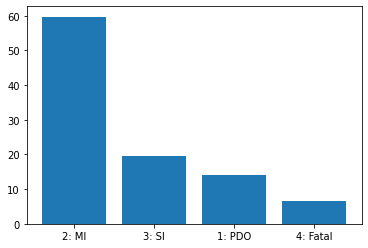

In [33]:
drugs_positive_list = drugs_positive_percentage.collect()
x = [c[0] for c in drugs_positive_list]
y = [c[2] for c in drugs_positive_list]
plt.bar(x,y, label = "drugs_positive")

<BarContainer object of 4 artists>

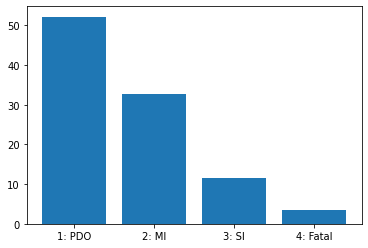

In [34]:
alcohol_positive_list = alcohol_positive_percentage.collect()
x = [c[0] for c in alcohol_positive_list]
y = [c[2] for c in alcohol_positive_list]
plt.bar(x,y, label = "drugs_positive")

<BarContainer object of 4 artists>

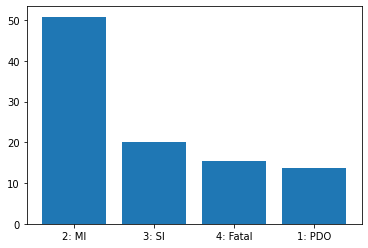

In [35]:
drugs_alcohol_positive_list = drugs_alcohol_positive_percentage.collect()
x = [c[0] for c in drugs_alcohol_positive_list]
y = [c[2] for c in drugs_alcohol_positive_list]
plt.bar(x,y, label = "drugs_positive")

<BarContainer object of 4 artists>

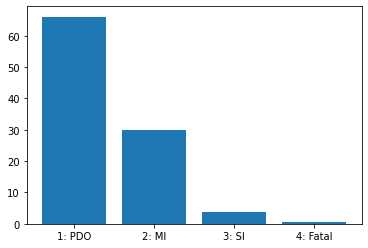

In [36]:
drugs_alcohol_negative_list = drugs_alcohol_negative_percentage.collect()
x = [c[0] for c in drugs_alcohol_negative_list]
y = [c[2] for c in drugs_alcohol_negative_list]
plt.bar(x,y, label = "drugs_positive")